In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

base_path = r"C:\Users\\mateu\\Documents\\workdir\\mba\\robotics\\people-detector\\human-and-non-human\\training_set"
test_path = r"C:\Users\\mateu\\Documents\\workdir\\mba\\robotics\\people-detector\\human-and-non-human\\test_set"

classes = ["NENHUM", "PESSOA"]


from tensorflow import keras

from keras import applications

model_path = base_path+'/home-people-train-model.h5'

model = keras.models.load_model(model_path)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
NENHUM: 99.91%
PESSOA: 0.09%


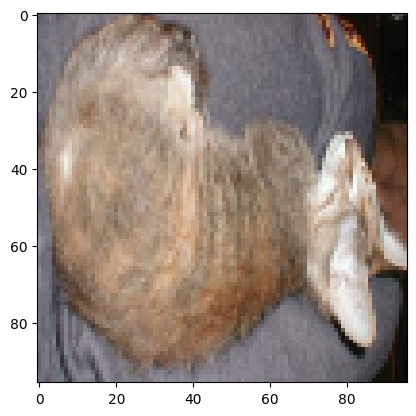

In [8]:
DIM = 96

image_path = "/non-humans/cat_0001.jpg" #NENHUM

image_path = test_path+"/"+image_path

image = cv2.imread(image_path)
image = cv2.resize(image, (DIM, DIM))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image, cmap='gray')

image = np.array(image/255, dtype="float32")

image = image.reshape(1,DIM,DIM,3)

preds = model.predict(image)

for i in range(len(classes)):
    print("{}: {:.2f}%".format(classes[i], preds[0][i]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
NENHUM: 0.00%
PESSOA: 100.00%


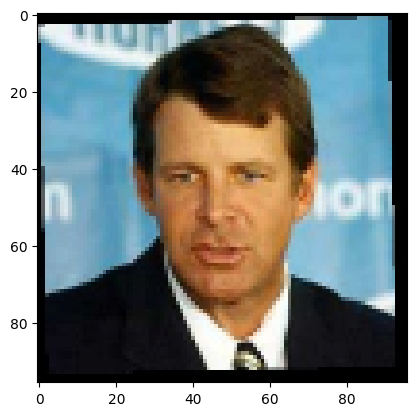

In [9]:
DIM = 96

image_path = "/humans/Tim_Floyd_0001.jpg" #PESSOA

image_path = test_path+"/"+image_path

image = cv2.imread(image_path)
image = cv2.resize(image, (DIM, DIM))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image, cmap='gray')

image = np.array(image/255, dtype="float32")

image = image.reshape(1,DIM,DIM,3)

preds = model.predict(image)

for i in range(len(classes)):
    print("{}: {:.2f}%".format(classes[i], preds[0][i]*100))

In [10]:
import tensorflow as tf

tflite = "home-people-train-model.tflite"

with open(base_path+"/"+tflite, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

NENHUM: 127.00
PESSOA: -127.00


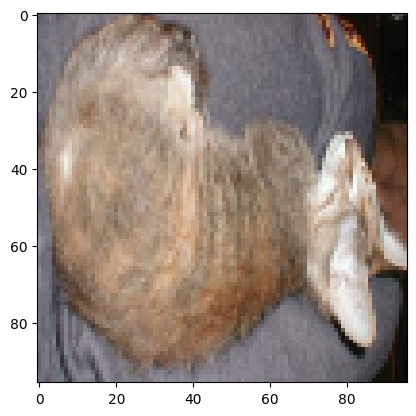

In [11]:
import numpy as np

image_path = "/non-humans/cat_0001.jpg" #NENHUM

image_path = test_path+"/"+image_path

image = cv2.imread(image_path)
image = cv2.resize(image, (DIM, DIM))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image, cmap='gray')

image = np.array(image-128, dtype="int8")

image = image.reshape(1,DIM,DIM,3)

interpreter.set_tensor(input_index, image)

interpreter.invoke()

preds = interpreter.get_tensor(output_index)


for i in range(len(classes)):
    print("{}: {:.2f}".format(classes[i], preds[0][i]))

    


NENHUM: -128.00
PESSOA: 127.00


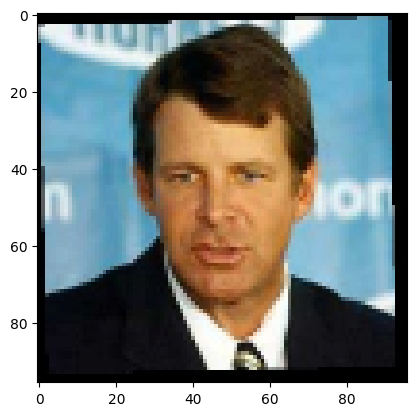

In [12]:
import numpy as np

image_path = "/humans/Tim_Floyd_0001.jpg" #PESSOA

image_path = test_path+"/"+image_path

image = cv2.imread(image_path)
image = cv2.resize(image, (DIM, DIM))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image, cmap='gray')

image = np.array(image-128, dtype="int8")

image = image.reshape(1,DIM,DIM,3)

interpreter.set_tensor(input_index, image)

interpreter.invoke()

preds = interpreter.get_tensor(output_index)


for i in range(len(classes)):
    print("{}: {:.2f}".format(classes[i], preds[0][i]))

    
